In [1]:
import numpy as np
import pandas as pd

#load the dataset
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('dataset/housing.csv',delim_whitespace=True, names=names)

#relevant features
# X = data[['RM','LSTAT','PTRATIO']]
# y = data['MEDV']
pd.set_option('precision', 2)

In [28]:
X_train

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [3]:
# histograms
data.hist(bins=10,figsize=(12,12),grid=False);

#exponential distribution Age,B,CRIM,ZN
#bimodial distribution RAD & TAX

In [4]:
y = data['MEDV']
data = data.drop(['CRIM','ZN','INDUS','NOX','AGE','DIS','RAD'], axis = 1)
X = data.drop('MEDV', axis = 1)
data.head()

,CHAS,RM,TAX,PTRATIO,B,LSTAT,MEDV
0,0,6.58,296.0,15.3,396.90,4.98,24.0
1,0,6.42,242.0,17.8,396.90,9.14,21.6
2,0,7.18,242.0,17.8,392.83,4.03,34.7
3,0,7.00,222.0,18.7,394.63,2.94,33.4
4,0,7.15,222.0,18.7,396.90,5.33,36.2


C:\Users\john\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


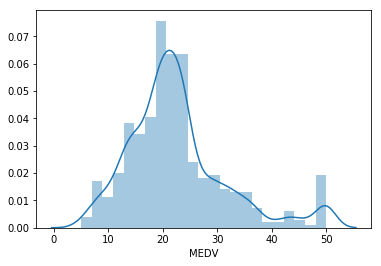

In [5]:
#histogram
import seaborn as sns
sns.distplot(y);
# MEDV is Deviated from the normal distribution, have appreciable positive skewness and showed peakedness.

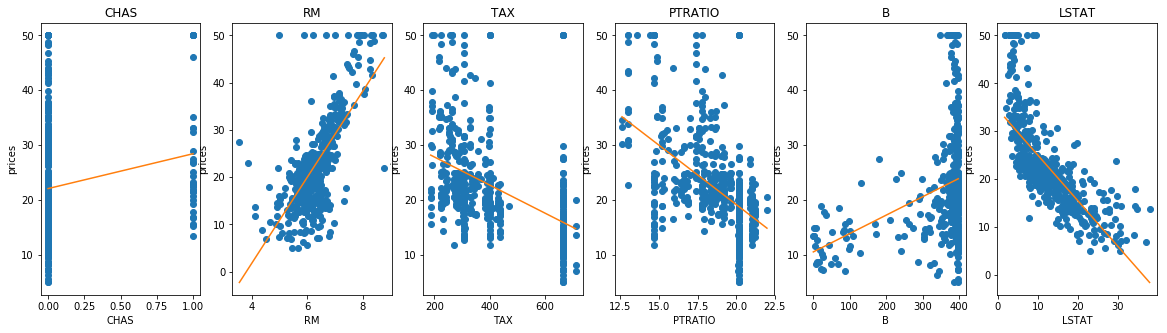

In [6]:
#visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))


for i,col in enumerate(X.columns):
    plt.subplot(1, len(X.columns), i+1)
    x = data[col]
    plt.plot(x, y, 'o')
    # regression line
    # polyfit(x,y,1) returns the coefficient that minimises the squared error and it is reverse order
    # poy1d plots the x values in the function
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')
    

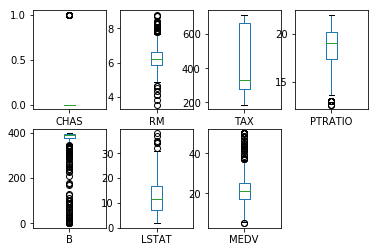

In [7]:
data.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.show()


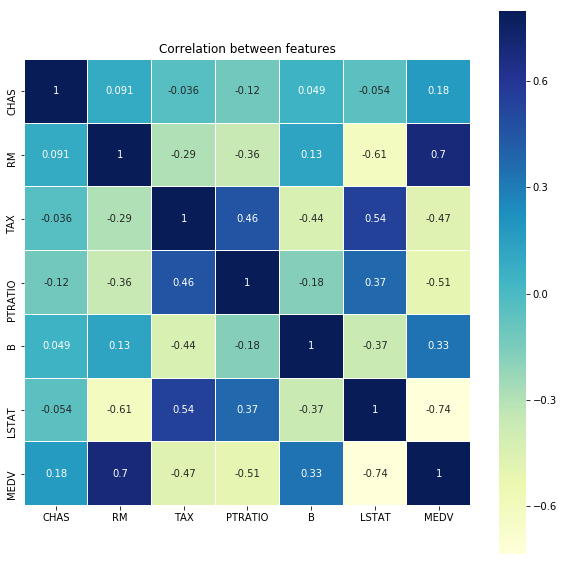

In [8]:
corr=data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [9]:
# Variables having strong Corelation with target varible MEDV are RM , LSTAT, PTRATIO
X = X[['RM','LSTAT','PTRATIO']]
X

,RM,LSTAT,PTRATIO
0,6.58,4.98,15.3
1,6.42,9.14,17.8
2,7.18,4.03,17.8
3,7.00,2.94,18.7
4,7.15,5.33,18.7
5,6.43,5.21,18.7
6,6.01,12.43,15.2
7,6.17,19.15,15.2
8,5.63,29.93,15.2
9,6.00,17.10,15.2


C:\Users\john\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


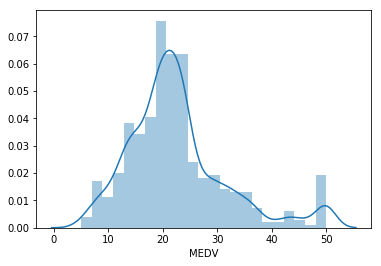

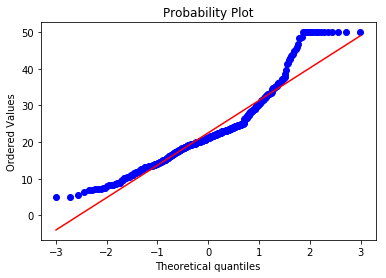

In [10]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(y, hist=True);
fig = plt.figure()
res = stats.probplot(y, plot=plt)


In [11]:
# There are lot of metric available to measure the goodness of fit, in this we will r2 
from sklearn.metrics import r2_score

def performance_metric(y_actual,y_pred):
    return r2_score(y_actual,y_pred)


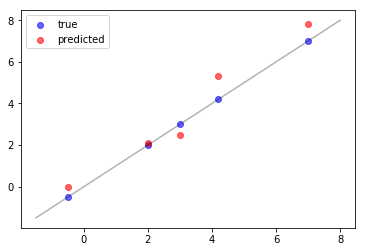

In [12]:
# performance metric visualization
true, pred = [3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]

#Plot true values
true_handle = plt.scatter(true, true,alpha=0.6,  color='blue', label='true')

#Reference line
fit = np.poly1d(np.polyfit(true,true,1))
lims = np.linspace(min(true) - 1, max(true) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

#Plot predicted values
pred_handle = plt.scatter(true, pred, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.show()

In [13]:
# preparing train and test data
# train_test_split method helps to split the input with the given size and to avoid overfitting
# test size range between 0 to 1 , mention percentage needs between this number
# random_state helps to maintain the same dataset. if it is not mentioned, dataset gets shuffled everytime you run this block 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


In [14]:
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    
    # Make the GridSearchCV object
    reg = GridSearchCV(regressor,parameters,cv=5)
    
    reg.fit(X, y)
    

In [15]:
from sklearn.tree import DecisionTreeRegressor 

def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = plt.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()
    

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


C:\Users\john\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


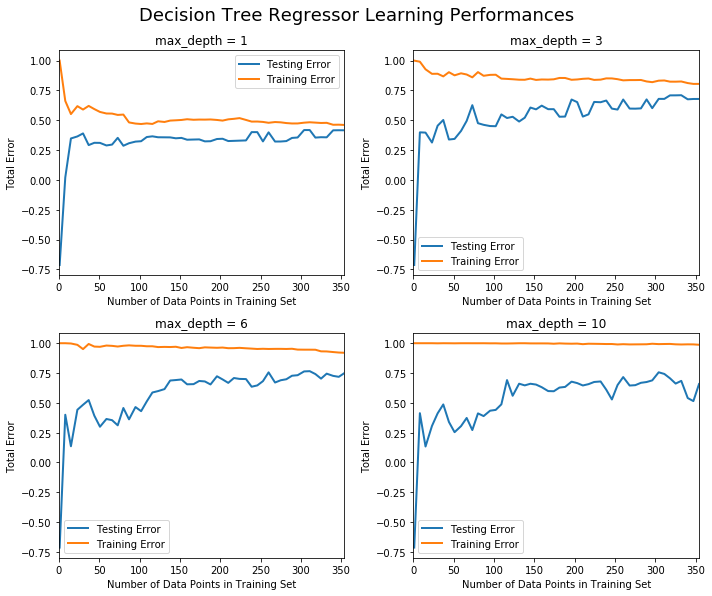

In [16]:
learning_curves(X_train, y_train, X_test, y_test)

In [17]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, test_err,'o-' , lw=2, label = 'Testing Error')
    plt.plot(max_depth, train_err,'o-' , lw=2, label = 'Training Error')
    plt.legend()
    plt.xlabel('Maximum Depth')
    plt.ylabel('Total Error')
    plt.show()

Creating a model complexity graph. . . 


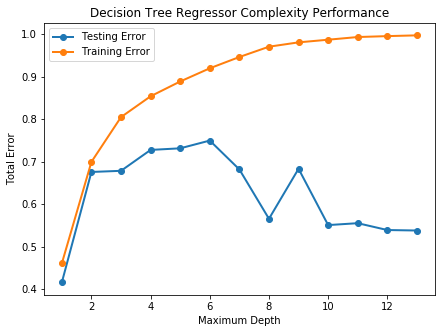

In [18]:
model_complexity(X_train, y_train, X_test, y_test)

In [19]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, cv=5, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\Users\john\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

In [21]:
reg

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [22]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $20.65
Predicted selling price for Client 2's home: $13.60
Predicted selling price for Client 3's home: $44.51


In [23]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 1,1,1,1,1,0,0])
kf = KFold(n_splits=4)
kf.get_n_splits(X)

print(kf)  
KFold(n_splits=2, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
KFold(n_splits=2, random_state=None, shuffle=False)
print("1 -------------------")
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    
    y_train, y_test = y[train_index], y[test_index]
print("2 -------------------")
KFold(n_splits=2,  shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
print("3 -------------------")

KFold(n_splits=4, random_state=None, shuffle=False)
TRAIN: [2 3 4 5 6 7] TEST: [0 1]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
TRAIN: [0 1 2 3 6 7] TEST: [4 5]
TRAIN: [0 1 2 3 4 5] TEST: [6 7]
1 -------------------
TRAIN: [2 3 4 5 6 7] TEST: [0 1]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
TRAIN: [0 1 2 3 6 7] TEST: [4 5]
TRAIN: [0 1 2 3 4 5] TEST: [6 7]
2 -------------------
TRAIN: [2 3 4 5 6 7] TEST: [0 1]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
TRAIN: [0 1 2 3 6 7] TEST: [4 5]
TRAIN: [0 1 2 3 4 5] TEST: [6 7]
3 -------------------
